In [90]:
#Se importan librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.style.use('fivethirtyeight')

In [3]:
#Data 

vacunas = pd.read_csv('/Users/rodolfopardo/Downloads/vacunas_covid.csv')

#Tiene como fuente el Ministerio de salud de la Nación

#### Exploración de nuestros datos

In [12]:
#Dimensiones

print('Esta base de datos contiene {} filas como {} columnas.'.format(vacunas.shape[0], vacunas.shape[1]))

Esta base de datos contiene 6433141 filas como 15 columnas.


In [18]:
#Tipos de datos

vacunas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433141 entries, 0 to 6433140
Data columns (total 15 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   sexo                        object
 1   grupo_etario                object
 2   jurisdiccion_residencia     object
 3   jurisdiccion_residencia_id  int64 
 4   depto_residencia            object
 5   depto_residencia_id         int64 
 6   jurisdiccion_aplicacion     object
 7   jurisdiccion_aplicacion_id  int64 
 8   depto_aplicacion            object
 9   depto_aplicacion_id         int64 
 10  fecha_aplicacion            object
 11  vacuna                      object
 12  condicion_aplicacion        object
 13  orden_dosis                 int64 
 14  lote_vacuna                 object
dtypes: int64(5), object(10)
memory usage: 736.2+ MB


In [19]:
#Primeros valores de nuestro dataframe

vacunas.head()

,sexo,grupo_etario,jurisdiccion_residencia,jurisdiccion_residencia_id,depto_residencia,depto_residencia_id,jurisdiccion_aplicacion,jurisdiccion_aplicacion_id,depto_aplicacion,depto_aplicacion_id,fecha_aplicacion,vacuna,condicion_aplicacion,orden_dosis,lote_vacuna
0,M,60-69,Mendoza,50,Luján de Cuyo,63,Mendoza,50,Luján de Cuyo,63,2021-04-06,Sputnik,>60,1,I-250321
1,M,60-69,Mendoza,50,Luján de Cuyo,63,Mendoza,50,Luján de Cuyo,63,2021-04-09,Sputnik,>60,1,I-340321
2,M,18-29,Salta,66,Capital,28,Salta,66,Capital,28,2021-02-22,Sputnik,Salud,1,I-080121
3,M,18-29,Salta,66,Capital,28,Salta,66,Capital,28,2021-04-07,Sputnik,Salud,2,II-090221
4,M,40-49,Corrientes,18,General Alvear,56,Corrientes,18,General Alvear,56,2021-02-22,COVISHIELD,Salud,1,4120Z023


In [20]:
#Ultimos valores de nuestro dataframe

vacunas.tail()

,sexo,grupo_etario,jurisdiccion_residencia,jurisdiccion_residencia_id,depto_residencia,depto_residencia_id,jurisdiccion_aplicacion,jurisdiccion_aplicacion_id,depto_aplicacion,depto_aplicacion_id,fecha_aplicacion,vacuna,condicion_aplicacion,orden_dosis,lote_vacuna
6433136,F,80-89,Mendoza,50,Maipú,70,Mendoza,50,Maipú,70,2021-03-29,Sputnik,>60,1,I-220321
6433137,F,70-79,Mendoza,50,Guaymallén,28,Mendoza,50,Luján de Cuyo,63,2021-03-31,Sputnik,>60,1,I-250321
6433138,F,60-69,Santiago del Estero,86,Capital,49,Santiago del Estero,86,Capital,49,2021-03-31,Sputnik,>60,1,I-210321
6433139,M,70-79,Misiones,54,Iguazú,63,Misiones,54,Iguazú,63,2021-03-30,Sputnik,>60,1,I-060121
6433140,F,40-49,Buenos Aires,6,San Miguel,760,Buenos Aires,6,José C. Paz,412,2021-03-31,Sputnik,Estratégico,1,I-220321


In [249]:
vacunas.jurisdiccion_aplicacion.value_counts()

Buenos Aires           2516225
CABA                    636402
Córdoba                 525272
Santa Fe                498796
Mendoza                 245489
Tucumán                 210991
Entre Ríos              176455
Salta                   175281
Chaco                   154168
Corrientes              133659
Misiones                130156
Santiago del Estero     112433
San Juan                111962
Río Negro               111185
Jujuy                   102114
San Luis                 86215
Formosa                  84805
Neuquén                  84714
Chubut                   77250
La Pampa                 62518
La Rioja                 60912
Catamarca                59239
Santa Cruz               49817
Tierra del Fuego         27083
Name: jurisdiccion_aplicacion, dtype: int64

#### Comenzando a filtrar nuestra base por Mendoza

In [238]:
#Filtrando 

vacunas_mdz = vacunas.loc[vacunas['jurisdiccion_aplicacion'] == "Mendoza", ['sexo', 'grupo_etario', 
                                                                           'jurisdiccion_residencia',
                                                                           'depto_aplicacion',
                                                                            'fecha_aplicacion',
                                                                           'vacuna',
                                                                           'condicion_aplicacion',
                                                                            'orden_dosis'
                                                                           ]]

In [253]:
vacunas_mdz.shape

(245489, 8)

In [239]:
#Verificando que tenemos nuestros datos en Mendoza

vacunas_mdz.head()

,sexo,grupo_etario,jurisdiccion_residencia,depto_aplicacion,fecha_aplicacion,vacuna,condicion_aplicacion,orden_dosis
0,M,60-69,Mendoza,Luján de Cuyo,2021-04-06,Sputnik,>60,1
1,M,60-69,Mendoza,Luján de Cuyo,2021-04-09,Sputnik,>60,1
9,M,40-49,Mendoza,San Rafael,2021-04-09,Sinopharm,Salud,1
10,M,60-69,Mendoza,Guaymallén,2021-04-08,Sputnik,>60,1
11,M,60-69,Mendoza,Guaymallén,2021-04-14,Sinopharm,>60,1


In [240]:
#Verificando si tenemos datos actualizados al día de ayer 

vacunas_mdz[vacunas_mdz['fecha_aplicacion'] == "2021-04-19"].count()

sexo                       3006
grupo_etario               3006
jurisdiccion_residencia    3006
depto_aplicacion           3006
fecha_aplicacion           3006
vacuna                     3006
condicion_aplicacion       3006
orden_dosis                3006
dtype: int64

Tenemos 2994 correspondientes al día de ayer en Mendoza. <font color = green><strong>La base de datos está actualizada</strong></font>

In [241]:
#Corregimos fecha para poder jugar con dicha variable 

vacunas_mdz['fecha_aplicacion'] = pd.to_datetime(vacunas_mdz['fecha_aplicacion'], format = "%Y-%m-%d")

#### Visualizando datos

<p><font color= blue>Vacunas aplicadas por día</font></p>

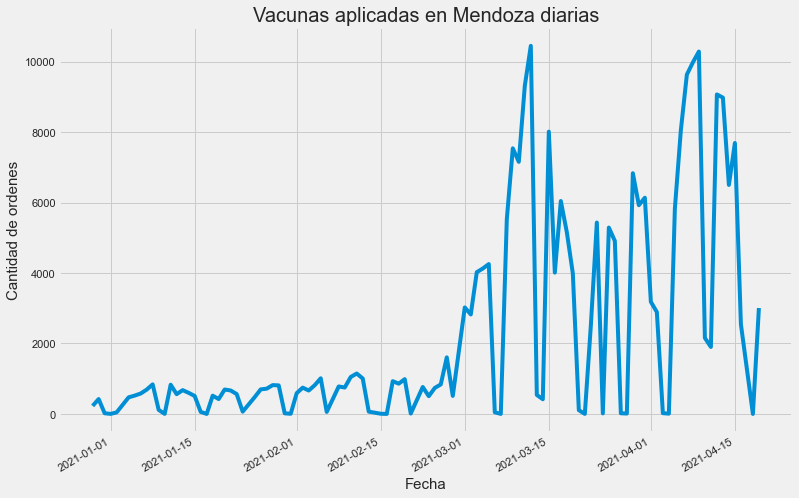

<Figure size 842.4x595.44 with 0 Axes>

In [242]:
x = vacunas_mdz.groupby('fecha_aplicacion')['orden_dosis'].count().plot()
plt.title('Vacunas aplicadas en Mendoza diarias', fontsize = 20)
plt.xlabel('Fecha', fontsize = 15)
plt.ylabel('Cantidad de ordenes', fontsize = 15)
plt.show()
plt.savefig('vacunas_aplicadas_por_fecha.png')

<p><font color= blue>Dosis aplicadas por departamento</font></p>

[]

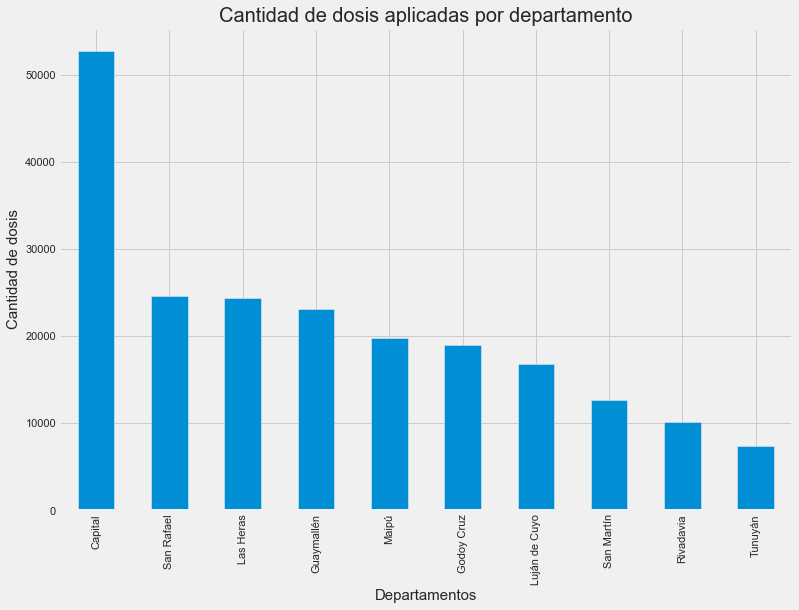

In [250]:
vacunas_mdz.groupby('depto_aplicacion')['orden_dosis'].count().sort_values(ascending = False).head(10).plot.bar()
plt.title('Cantidad de dosis aplicadas por departamento', fontsize = 20)
plt.xlabel('Departamentos', fontsize = 15)
plt.ylabel('Cantidad de dosis', fontsize = 15)
plt.plot()

In [251]:
vacunas_mdz['depto_aplicacion'].value_counts(normalize = True).head(10)

Capital          0.214955
San Rafael       0.100404
Las Heras        0.099222
Guaymallén       0.094269
Maipú            0.080831
Godoy Cruz       0.077270
Luján de Cuyo    0.068533
San Martín       0.051786
Rivadavia        0.041297
Tunuyán          0.030185
Name: depto_aplicacion, dtype: float64

<p><font color= blue>Tipo de dosis aplicada por departamento</font></p>

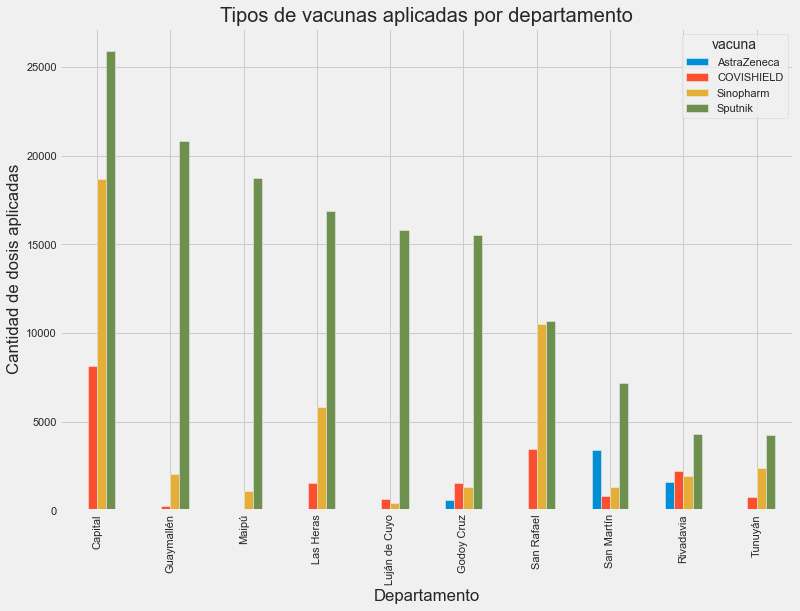

In [252]:
vacunas_mdz.groupby(['depto_aplicacion', 'vacuna']).size().unstack(level=1, 
                                                                   fill_value=0).sort_values(ascending = False, 
                                                                                                      by = "Sputnik").head(10).plot.bar()
plt.title('Tipos de vacunas aplicadas por departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de dosis aplicadas')
plt.show()

In [225]:
vacunas_mdz.groupby(['depto_aplicacion', 'vacuna']).size().unstack(level=1, 
                                                                   fill_value=0).sort_values(ascending = False, 
                                                                                                      by = "Sputnik").head(10)


vacuna,AstraZeneca,COVISHIELD,Sinopharm,Sputnik
depto_aplicacion,,,,
Capital,6,8001,18496,25660
Guaymallén,0,236,1997,20578
Maipú,0,3,1082,18527
Las Heras,53,1530,5737,16682
Luján de Cuyo,0,596,393,15543
Godoy Cruz,546,1540,1302,15393
San Rafael,0,3431,10248,10481
San Martín,3351,803,1319,7083
Rivadavia,1568,2209,1943,4297


<p><font color= blue>Género de población vacunada por departamento</font></p>

In [227]:
#Ordenado por mujeres

vacunas_mdz.groupby(['depto_aplicacion', 'sexo']).size().unstack(level=1, 
                                                                   fill_value=0).sort_values(ascending = False, 
                                                                                                      by = "F").head(10)

sexo,F,M,S.I.
depto_aplicacion,,,
Capital,34005,17938,220
San Rafael,14511,9565,84
Las Heras,14039,9867,96
Guaymallén,13691,8998,122
Godoy Cruz,11389,7284,108
Maipú,11275,8261,76
Luján de Cuyo,9178,7264,90
San Martín,7345,5187,24
Rivadavia,5927,4049,41


In [231]:
#Ordenados por masculino

vacunas_mdz.groupby(['depto_aplicacion', 'sexo']).size().unstack(level=1, 
                                                                   fill_value=0).sort_values(ascending = False, 
                                                                                                      by = "M").head(10)

sexo,F,M,S.I.
depto_aplicacion,,,
Capital,34005,17938,220
Las Heras,14039,9867,96
San Rafael,14511,9565,84
Guaymallén,13691,8998,122
Maipú,11275,8261,76
Godoy Cruz,11389,7284,108
Luján de Cuyo,9178,7264,90
San Martín,7345,5187,24
Rivadavia,5927,4049,41


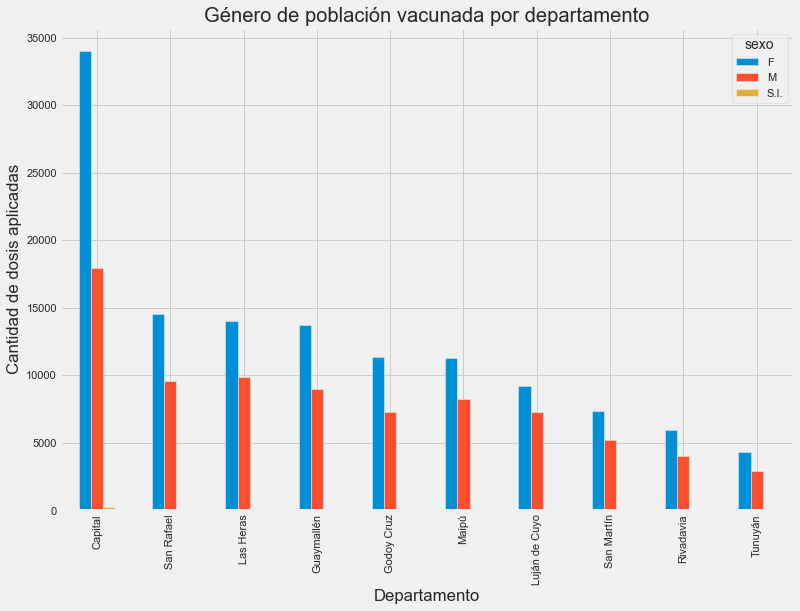

In [229]:
vacunas_mdz.groupby(['depto_aplicacion', 'sexo']).size().unstack(level=1, 
                                                                   fill_value=0).sort_values(ascending = False, 
                                                                                                      by = "F").head(10).plot.bar()
plt.title('Género de población vacunada por departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de dosis aplicadas')
plt.show()

<p><font color= blue>Vacunación por grupo etario</font></p>

In [233]:
#Ordenados por masculino

vacunas_mdz.groupby(['depto_aplicacion', 'grupo_etario']).size().unstack(level=1, 
                                                                   fill_value=0).sort_values(ascending = False, 
                                                                                                      by = "60-69").head(10)

grupo_etario,18-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,>=100,S.I.
depto_aplicacion,,,,,,,,,,
Capital,3862,7545,8726,6687,9933,9604,4701,1085,17,3
Las Heras,225,964,1006,773,7793,9623,3196,409,7,6
Maipú,231,640,654,470,6322,8196,2790,304,4,1
Luján de Cuyo,96,244,330,238,5179,7418,2620,398,8,1
San Rafael,870,1863,2059,1538,5148,8775,3399,488,10,10
Guaymallén,834,1987,1686,1171,4985,8661,3055,421,7,4
San Martín,343,761,824,557,3587,4636,1660,185,2,1
Rivadavia,223,535,667,463,2853,3587,1495,194,0,0
Godoy Cruz,616,1838,1759,1125,2147,7928,2963,398,7,0


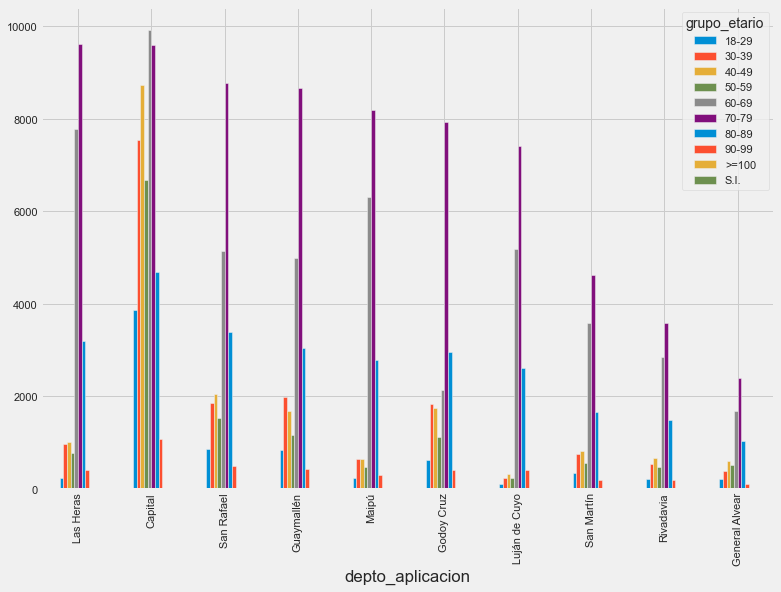

In [235]:
#Ordenados por masculino

vacunas_mdz.groupby(['depto_aplicacion', 'grupo_etario']).size().unstack(level=1, 
                                                                   fill_value=0).sort_values(ascending = False, 
                                                                                                      by = "70-79").head(10).plot.bar()

<p><font color= "blue">Vacunación por condición en cada departamento</font></p>

In [237]:
#Vacunación por condicion

vacunas_mdz.groupby(['depto_aplicacion', 'condicion_aplicacion']).size().unstack(level=1, 
                                                                   fill_value=0).sort_values(ascending = False, 
                                                                                                      by = ">60").head(10)

condicion_aplicacion,>60,Estratégico,Otros,Riesgo,Salud
depto_aplicacion,,,,,
Capital,23140,9327,1,2314,17381
Las Heras,20256,345,1,5,3395
Maipú,17413,11,37,2,2149
San Rafael,17306,2181,0,407,4266
Guaymallén,16706,110,2,7,5986
Luján de Cuyo,15579,306,0,17,630
Godoy Cruz,13076,35,0,35,5635
San Martín,9859,203,0,0,2494
Rivadavia,7946,575,0,27,1469


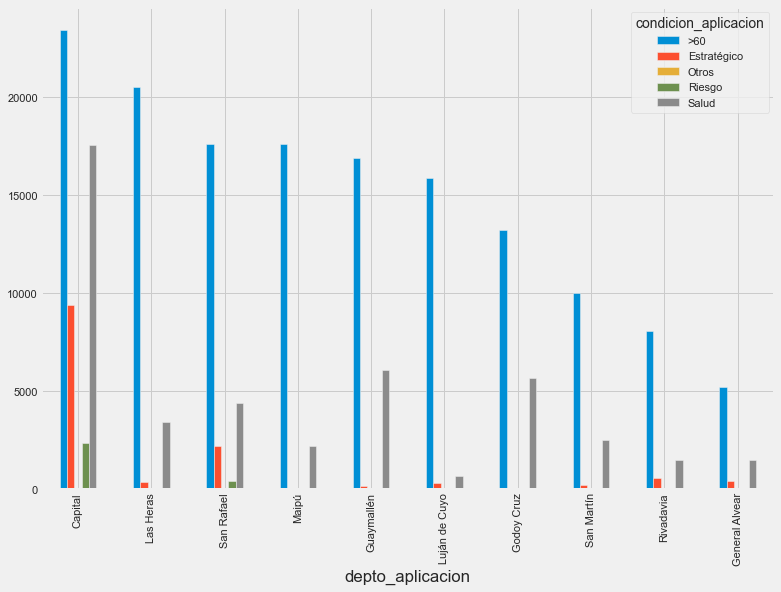

In [254]:
vacunas_mdz.groupby(['depto_aplicacion', 'condicion_aplicacion']).size().unstack(level=1, 
                                                                   fill_value=0).sort_values(ascending = False, 
                                                                                                      by = ">60").head(10).plot.bar()

<p><font color="blue">Cantidad de dosis aplicada por persona</font></p>

In [268]:
vacunas_mdz.groupby(['depto_aplicacion','sexo','orden_dosis']).size().unstack(level=1, fill_value=0).to_csv('dosis_dpto.csv')


In [269]:
vacunas_mdz.groupby(['depto_aplicacion','sexo','orden_dosis']).size().unstack(level=1, fill_value=0)

sexo                              F      M  S.I.
depto_aplicacion orden_dosis                    
Capital          1            31265  16174   340
                 2             2986   1977    27
General Alvear   1             3574   2293    36
                 2              743    459     0
Godoy Cruz       1            10046   6507   132
                 2             1420    852    12
Guaymallén       1            11965   8146   150
                 2             1876    994    11
Junín            1             4003   2050    18
                 2              247    144     3
La Paz           1              846    588    10
                 2              207    135     3
Las Heras        1            13112   9397   148
                 2             1066    628     7
Lavalle          1             1882   1595    18
                 2              487    379     8
Luján de Cuyo    1             8586   6897   110
                 2              717    508     6
Maipú            1            10167   7699   105
                 2             1182    683     7
Malargüe         1             1742   1154    12
                 2              346    223     1
Rivadavia        1             5133   3546    66
                 2              835    557     1
San Carlos       1             2188   1570   187
                 2              489    404     6
San Martín       1             6210   4515    36
                 2             1193    748    11
San Rafael       1            12878   8492   113
                 2             1875   1283     7
Santa Rosa       1             1534   1189    13
                 2              464    387     9
Tunuyán          1             3605   2536    38
                 2              764    463     4
Tupungato        1             1513   1138    11
                 2              196    168     3